In [41]:
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models
import gensim

tokenizer = RegexpTokenizer(r'\w+')

# create English stop words list
en_stop = set(stopwords.words('english'))

# Create p_stemmer of class PorterStemmer
p_stemmer = PorterStemmer()

In [42]:
# http://etienned.github.io/posts/extract-text-from-word-docx-simply/

try:
    from xml.etree.cElementTree import XML
except ImportError:
    from xml.etree.ElementTree import XML
import zipfile
import os
import json


"""
Module that extract text from MS XML Word document (.docx).
(Inspired by python-docx <https://github.com/mikemaccana/python-docx>)
"""

WORD_NAMESPACE = '{http://schemas.openxmlformats.org/wordprocessingml/2006/main}'
PARA = WORD_NAMESPACE + 'p'
TEXT = WORD_NAMESPACE + 't'


def get_docx_text(path):
    """
    Take the path of a docx file as argument, return the text in unicode.
    """
    document = zipfile.ZipFile(path)
    print(path)
    xml_content = document.read('word/document.xml')
    document.close()
    tree = XML(xml_content)

    paragraphs = []
    for paragraph in tree.getiterator(PARA):
        texts = [node.text
                 for node in paragraph.getiterator(TEXT)
                 if node.text]
        if texts:
            paragraphs.append(''.join(texts))

    return '\n\n'.join(paragraphs)

def doc_to_txt(root_dir, outpath):
    ''' convert all pdfs in root_dir to text including sub dirs
    '''
    # First open the outpath
    with open(outpath, 'w') as outf:
        # Now walk the files
        for root, _, files in os.walk(root_dir):
            for f in files:
                _, ext = os.path.splitext(f)
                if ext == '.doc' or ext == '.docx':
                    json.dump({'name': f, 'content': get_docx_text(os.path.join(root, f))}, outf)
                    outf.write('\n')
                    
doc_to_txt('c:\\tools\\code\\ResumeAnalytics\\Other Resumes', 'other2.jsonl')

c:\tools\code\ResumeAnalytics\Other Resumes\547820.docx
c:\tools\code\ResumeAnalytics\Other Resumes\551854.docx
c:\tools\code\ResumeAnalytics\Other Resumes\558202.docx
c:\tools\code\ResumeAnalytics\Other Resumes\563143.docx
c:\tools\code\ResumeAnalytics\Other Resumes\563742.docx
c:\tools\code\ResumeAnalytics\Other Resumes\567324.docx
c:\tools\code\ResumeAnalytics\Other Resumes\570462 (1).docx
c:\tools\code\ResumeAnalytics\Other Resumes\571023.docx
c:\tools\code\ResumeAnalytics\Other Resumes\571221.docx
c:\tools\code\ResumeAnalytics\Other Resumes\571681.docx
c:\tools\code\ResumeAnalytics\Other Resumes\571786.docx
c:\tools\code\ResumeAnalytics\Other Resumes\572535.docx
c:\tools\code\ResumeAnalytics\Other Resumes\572700.docx
c:\tools\code\ResumeAnalytics\Other Resumes\572765.docx
c:\tools\code\ResumeAnalytics\Other Resumes\572987.docx
c:\tools\code\ResumeAnalytics\Other Resumes\573939.docx
c:\tools\code\ResumeAnalytics\Other Resumes\576173.docx
c:\tools\code\ResumeAnalytics\Other Resumes\

In [43]:
from dirtojsonl import process_directory

process_directory('c:\\tools\\code\\ResumeAnalytics\\Candidate Resumes', 'candidate.jsonl')
process_directory('c:\\tools\\code\\ResumeAnalytics\\Target Resumes', 'target.jsonl')
process_directory('c:\\tools\\code\\ResumeAnalytics\\Other Resumes', 'other.jsonl')

import json
with open('candidate.jsonl', 'r') as cf, open('target.jsonl', 'r') as tf, open('other.jsonl', 'r') as of:
  candidate = [json.loads(line) for line in cf]
  target = [json.loads(line) for line in tf]
  other = [json.loads(line) for line in of]
    
mashed_target = ''
doc_set = []
other_set = []
for t in target:
  doc_set.append(t['content'])
for o in other:
  other_set.append(o['content'])

can_set = []
for c in candidate:
  can_set.append(c['content'])


c:\tools\code\ResumeAnalytics\Candidate Resumes\Yibing Li Resume (003).docx
c:\tools\code\ResumeAnalytics\Target Resumes\Matthew Daye_resume.docx
c:\tools\code\ResumeAnalytics\Other Resumes\547820.docx
c:\tools\code\ResumeAnalytics\Other Resumes\551854.docx
c:\tools\code\ResumeAnalytics\Other Resumes\558202.docx
c:\tools\code\ResumeAnalytics\Other Resumes\563143.docx
c:\tools\code\ResumeAnalytics\Other Resumes\563742.docx
c:\tools\code\ResumeAnalytics\Other Resumes\567324.docx
c:\tools\code\ResumeAnalytics\Other Resumes\570462 (1).docx
c:\tools\code\ResumeAnalytics\Other Resumes\571023.docx
c:\tools\code\ResumeAnalytics\Other Resumes\571221.docx
c:\tools\code\ResumeAnalytics\Other Resumes\571681.docx
c:\tools\code\ResumeAnalytics\Other Resumes\571786.docx
c:\tools\code\ResumeAnalytics\Other Resumes\572535.docx
c:\tools\code\ResumeAnalytics\Other Resumes\572700.docx
c:\tools\code\ResumeAnalytics\Other Resumes\572765.docx
c:\tools\code\ResumeAnalytics\Other Resumes\572987.docx
c:\tools\c

In [44]:

# list for tokenized documents in loop
texts = []

# loop through document list
for i in doc_set:
    
    # clean and tokenize document string
    raw = i.lower()
    tokens = tokenizer.tokenize(raw)

    # remove stop words from tokens
    stopped_tokens = [i for i in tokens if not i in en_stop]
    
    # stem tokens
    stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
    
    # add tokens to list
    texts.append(stemmed_tokens)

# Do it again for other list
for i in other_set:
    
    # clean and tokenize document string
    raw = i.lower()
    tokens = tokenizer.tokenize(raw)

    # remove stop words from tokens
    stopped_tokens = [i for i in tokens if not i in en_stop]
    
    # stem tokens
    stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
    
    # add tokens to list
    texts.append(stemmed_tokens)
    
# turn our tokenized documents into a id <-> term dictionary
dictionary = corpora.Dictionary(texts)
    
# convert tokenized documents into a document-term matrix
corpus = [dictionary.doc2bow(text) for text in texts]

# Seed the randomness so changes are more easily apparent (best practice)
numpy.random.seed
random.seed

# generate LDA model
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=14, id2word = dictionary, passes=30)

In [45]:
print (ldamodel.print_topics(num_topics = 14, num_words = 8))

[(0, '0.021*year + 0.013*comput + 0.013*2013 + 0.013*work + 0.013*program + 0.011*1 + 0.011*experi + 0.011*ursinu'), (1, '0.019*test + 0.012*yr + 0.011*use + 0.011*softwar + 0.010*applic + 0.010*develop + 0.010*creat + 0.009*manag'), (2, '0.017*applic + 0.016*develop + 0.014*1 + 0.010*year + 0.008*c + 0.007*2013 + 0.007*2011 + 0.007*io'), (3, '0.017*kumar + 0.017*vaibhaw + 0.012*use + 0.012*simul + 0.012*r + 0.012*errington + 0.010*jeffrey + 0.010*model'), (4, '0.018*manag + 0.016*system + 0.012*network + 0.011*secur + 0.009*use + 0.008*technic + 0.008*develop + 0.007*project'), (5, '0.010*li + 0.010*support + 0.009*engin + 0.008*includ + 0.008*data + 0.007*system + 0.007*program + 0.007*develop'), (6, '0.016*data + 0.012*analysi + 0.010*develop + 0.009*manag + 0.009*support + 0.008*2015 + 0.007*experi + 0.007*secur'), (7, '0.016*year + 0.014*work + 0.014*team + 0.012*data + 0.012*steven + 0.010*develop + 0.010*1 + 0.010*ms'), (8, '0.027*develop + 0.014*softwar + 0.011*project + 0.011*

In [46]:
import numpy

print (">>>>Target:<<<<\n")
target_topics = []
for i in target:
    raw = i['content'].lower()
    tokens = tokenizer.tokenize(raw)
    stopped_tokens = [i for i in tokens if not i in en_stop]
    stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
    print (i['name'])
    topics = ldamodel.get_document_topics(dictionary.doc2bow(stemmed_tokens))
    print (topics)
    for topic in topics:
        target_topics = numpy.append(target_topics, topic[0])
    target_topics = numpy.unique(target_topics)
    print (target_topics)
    
    
print ("\n\n>>>>Other:<<<<\n")
for i in other:
    raw = i['content'].lower()
    tokens = tokenizer.tokenize(raw)
    stopped_tokens = [i for i in tokens if not i in en_stop]
    stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
    print (i['name'])
    print (ldamodel.get_document_topics(dictionary.doc2bow(stemmed_tokens)))    
    
print ("\n\n>>>>Candidates:<<<<\n")

for i in candidate:
    raw = i['content'].lower()
    tokens = tokenizer.tokenize(raw)
    stopped_tokens = [i for i in tokens if not i in en_stop]
    stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
    i['distance'] = 0
    for topic in ldamodel.get_document_topics(dictionary.doc2bow(stemmed_tokens)):
        if (topic[0] in target_topics):
            i['distance'] = i['distance'] + topic[1]
    print (i['name'] + ": " + str(i['distance']))
    print (ldamodel.get_document_topics(dictionary.doc2bow(stemmed_tokens)))



>>>>Target:<<<<

Brandon Herzog Resume 2010.txt
[(11, 0.99674184264975263)]
[ 11.]
DrewChenResume.txt
[(8, 0.99662336156646836)]
[  8.  11.]
Kyle Shaw Resume 2016.txt
[(8, 0.99875526212733146)]
[  8.  11.]
Resume_Alejandro_Hired.txt
[(3, 0.99761291609977776)]
[  3.   8.  11.]
ToddOldResume.txt
[(11, 0.99553569441170153)]
[  3.   8.  11.]
Matthew Daye_resume.docx
[(11, 0.99649594112396145)]
[  3.   8.  11.]


>>>>Other:<<<<

569362.txt
[(7, 0.99833588780017068)]
570627.txt
[(4, 0.99865032754555338)]
572273.txt
[(8, 0.78273143700036185), (9, 0.21503641073363552)]
573879.txt
[(8, 0.33577321038239755), (10, 0.66139364292650404)]
576768.txt
[(6, 0.98506512585168682), (10, 0.012630719104516935)]
576816.txt
[(11, 0.99880951892935532)]
578035.txt
[(1, 0.12821448513017564), (3, 0.23270931144668952), (8, 0.21559316331567721), (9, 0.42104519342161695)]
579014.txt
[(5, 0.99802430798189645)]
579712.txt
[(2, 0.9975171796750808)]
580539.txt
[(9, 0.99681994708049282)]
580639.txt
[(2, 0.763465472861252

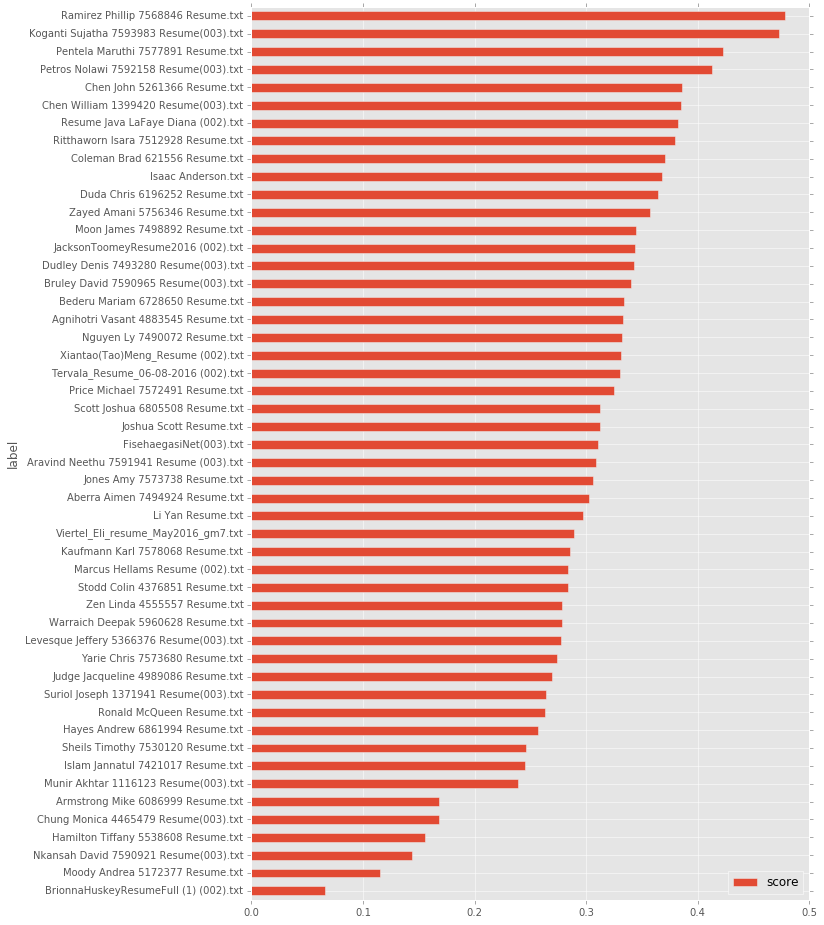

In [47]:
%matplotlib inline
import pandas as pd
import matplotlib
matplotlib.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = (10.0, 16.0)

result = []
for i in range(len(candidate)):
    result.append((candidate[i]['name'], candidate[i]['distance']))
result = sorted(result, key=lambda x: x[1], reverse=False)

df = pd.DataFrame(result, columns=['label', 'score'])
df[:50].plot(kind='barh', x='label', y='score');